In [2]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta

In [98]:
scm_2023 = pd.read_csv('../2023/Data/2023_scm_counts.csv')
scm_2023 = clean_columns(scm_2023)
scm_2023['date'] = pd.to_datetime(scm_2023["date"], format="%m/%d/%y")
scm_2023[['n_scm_i_m', 'n_scm_o_m', 'n_scm_i_f', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']] = scm_2023[['n_scm_i_m', 'n_scm_o_m', 'n_scm_i_f', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']].apply(pd.to_numeric, errors='coerce')
scm_2023['scm_male'] = scm_2023['n_scm_i_m'] + scm_2023['n_scm_o_m']
scm_2023['scm_female'] = scm_2023['n_scm_i_f'] + scm_2023['n_scm_o_f']
scm_2023['total_scm'] = scm_2023['n_scm_i_m'] + scm_2023['n_scm_o_m'] + scm_2023['n_scm_i_f'] + scm_2023['n_scm_o_f']
scm_2023 = scm_2023.dropna(subset=['total_scm'])
scm_2023['florilega'] = scm_2023['n_d_florilega_i'] + scm_2023['n_d_florilega_o']
scm_2023 = scm_2023.sort_values('date')
scm_2023['season_total'] = scm_2023.groupby('site')['total_scm'].transform('sum')
scm_2023['male_total'] = scm_2023.groupby('site')['scm_male'].transform('sum')
scm_2023['female_total'] = scm_2023.groupby('site')['scm_female'].transform('sum')
scm_2023['weekly_prop'] = scm_2023['total_scm'] / scm_2023['season_total']
scm_2023['season_prop'] = scm_2023.groupby('site')['weekly_prop'].transform('cumsum')
scm_2023['weekly_prop_m'] = scm_2023['scm_male'] / scm_2023['male_total']
scm_2023['weekly_prop_f'] = scm_2023['scm_female'] / scm_2023['female_total']

scm_2023['season_male_prop'] = scm_2023.groupby('site')['weekly_prop_m'].transform('cumsum')
scm_2023['season_female_prop'] = scm_2023.groupby('site')['weekly_prop_f'].transform('cumsum')

scm_2023 = scm_2023[['card_id', 'site', 'date', 'total_scm', 'scm_male', 'scm_female', 'florilega', 'season_total', 
                    'male_total', 'female_total', 'weekly_prop', 'weekly_prop_f', 'weekly_prop_m', 'season_prop']]
scm_2023 = scm_2023.rename(columns={"site": "field_id", "date": "date_collected"})
scm_2023

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop
2379,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000
2374,2001,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.000000
2375,2002,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.000000
2378,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000
2377,2004,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,275.0,185.0,90.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,7400,DIP_CUR,2023-12-12,1.0,1.0,0.0,0.0,1309.0,655.0,654.0,0.000764,0.000000,0.001527,0.999236
7,7401,DIP_CUR,2023-12-19,0.0,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.999236
6,7402,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,1309.0,655.0,654.0,0.000764,0.001529,0.000000,1.000000
5,7403,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,1.000000


In [4]:
climate_2023 = pd.read_csv('../2023/Data/2023_scm_climate.csv')
climate_2023["date"] = pd.to_datetime(climate_2023["date"], format="%m/%d/%y")
climate_2023["week"] = climate_2023["date"].dt.strftime("%U")
climate_2023 = (
    climate_2023[
        ["field_id", "week", "ppt_in", "tmin_f", "tmean_f", "tmax_f", 'tdmean_f', 'vpdmin_hPa', 'vpdmax_hPa']
    ]
    .groupby(["field_id", "week"])
    .mean()
)
climate_2023 = climate_2023.reset_index()
climate_2023

,field_id,week,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa
0,DEG_DIE_HILL,01,0.155714,34.757143,41.200000,47.600000,38.242857,0.202857,2.875714
1,DEG_DIE_HILL,02,0.112857,23.885714,29.571429,35.242857,26.157143,0.302857,1.790000
2,DEG_DIE_HILL,03,0.174286,22.928571,27.800000,32.657143,25.842857,0.140000,1.212857
3,DEG_DIE_HILL,04,0.111429,24.985714,29.028571,33.057143,25.042857,0.247143,1.764286
4,DEG_DIE_HILL,05,0.018571,9.928571,19.057143,28.214286,13.814286,0.187143,2.425714
...,...,...,...,...,...,...,...,...,...
2963,ZUE_REE,49,0.145714,32.142857,36.700000,41.271429,33.200000,0.282857,2.212857
2964,ZUE_REE,50,0.044286,33.228571,39.400000,45.542857,28.614286,1.325714,5.080000
2965,ZUE_REE,51,0.150000,27.457143,32.957143,38.442857,28.942857,0.432857,2.368571
2966,ZUE_REE,52,0.158571,39.614286,43.300000,46.957143,40.814286,0.290000,2.067143


In [5]:
scm_2024 = pd.read_csv('../2024/Data/2024_scm_counts.csv')
scm_2024 = clean_columns(scm_2024)
scm_2024['date_collected'] = pd.to_datetime(scm_2024["date_collected"], format='mixed')
scm_2024['scm_male'] = scm_2024['n_scm_m_1'] + scm_2024['n_scm_m_2']
scm_2024['scm_female'] = scm_2024['n_scm_f_1'] + scm_2024['n_scm_f_2']
scm_2024['total_scm'] = scm_2024['n_scm_m_1'] + scm_2024['n_scm_m_2'] + scm_2024['n_scm_f_1'] + scm_2024['n_scm_f_2']
scm_2024 = scm_2024.dropna(subset=['total_scm'])
scm_2024 = scm_2024.sort_values('date_collected')

scm_2024['season_total'] = scm_2024.groupby('field_id')['total_scm'].transform('sum')
scm_2024['male_total'] = scm_2024.groupby('field_id')['scm_male'].transform('sum')
scm_2024['female_total'] = scm_2024.groupby('field_id')['scm_female'].transform('sum')
scm_2024['weekly_prop'] = scm_2024['total_scm'] / scm_2024['season_total']
scm_2024['season_prop'] = scm_2024.groupby('field_id')['weekly_prop'].transform('cumsum')
scm_2024['weekly_prop_m'] = scm_2024['scm_male'] / scm_2024['male_total']
scm_2024['weekly_prop_f'] = scm_2024['scm_female'] / scm_2024['female_total']

scm_2024['season_male_prop'] = scm_2024.groupby('field_id')['weekly_prop_m'].transform('cumsum')
scm_2024['season_female_prop'] = scm_2024.groupby('field_id')['weekly_prop_f'].transform('cumsum')
scm_2024 = scm_2024[['field_id', 'date_collected', 'total_scm', 'scm_male', 'scm_female', 'season_total', 
                    'male_total', 'female_total', 'weekly_prop', 'weekly_prop_f', 'weekly_prop_m']]
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m
640,GAB_STE,2024-03-08,0.0,0.0,0.0,81.0,51.0,30.0,0.000000,0.000000,0.000000
596,GAB_ALL,2024-03-08,1.0,1.0,0.0,220.0,169.0,51.0,0.004545,0.000000,0.005917
618,GAB_HEN,2024-03-08,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,0.000000,0.000000
1204,KIR_FIE_IN,2024-03-11,3.0,0.0,3.0,377.0,264.0,113.0,0.007958,0.026549,0.000000
1214,KIR_FIE_OUT,2024-03-11,0.0,0.0,0.0,563.0,446.0,117.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
406,DIP_FLE,2024-12-03,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,0.000000,0.000000
1348,POV_DUN,2024-12-03,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,0.000000,0.000000
483,DIP_PAT,2024-12-03,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,0.000000,0.000000
335,DIP_CUR,2024-12-03,0.0,0.0,0.0,2104.0,1222.0,882.0,0.000000,0.000000,0.000000


In [6]:
climate_2024 = pd.read_csv('../2024/Data/2024_scm_climate.csv')
climate_2024["date"] = pd.to_datetime(climate_2024["date"], format="%m/%d/%y")
climate_2024["week"] = climate_2024["date"].dt.strftime("%U")
climate_2024 = (
    climate_2024[
        ["field_id", "week", "ppt_in", "tmin_f", "tmean_f", "tmax_f", 'tdmean_f', 'vpdmin_hPa', 'vpdmax_hPa']
    ]
    .groupby(["field_id", "week"])
    .mean()
)
climate_2024 = climate_2024.reset_index()
climate_2024

,field_id,week,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa
0,DEG_DIE_HILL,00,0.013333,24.266667,27.750000,31.266667,22.983333,0.318333,1.486667
1,DEG_DIE_HILL,01,0.305714,27.900000,32.142857,36.385714,29.014286,0.155714,1.937143
2,DEG_DIE_HILL,02,0.047143,10.914286,17.814286,24.714286,9.971429,0.285714,1.887143
3,DEG_DIE_HILL,03,0.325714,21.557143,27.957143,34.328571,25.014286,0.122857,1.564286
4,DEG_DIE_HILL,04,0.131429,29.071429,31.714286,34.371429,29.542857,0.262857,1.067143
...,...,...,...,...,...,...,...,...,...
2327,ZUE_REE,48,0.011429,24.828571,28.485714,32.171429,20.114286,0.758571,2.644286
2328,ZUE_REE,49,0.121429,28.914286,34.442857,39.971429,27.142857,0.568571,2.810000
2329,ZUE_REE,50,0.110000,27.414286,32.257143,37.085714,26.942857,0.632857,2.384286
2330,ZUE_REE,51,0.015714,14.442857,21.042857,27.614286,16.642857,0.374286,1.675714


In [59]:
sticky_cards_merged = pd.concat([scm_2023, scm_2024])
sticky_cards_merged['week'] = sticky_cards_merged['date_collected'].dt.isocalendar().week.astype(int)
sticky_cards_merged['year'] = sticky_cards_merged['date_collected'].dt.isocalendar().year


sticky_cards_merged.to_csv('sticky_cards_merged.csv')

sticky_cards_merged

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop,week,year
2379,2006.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,1556.0,780.0,776.0,0.0,0.0,0.0,0.0,11,2023
2374,2001.0,DIP_CUR,2023-03-13,0.0,0.0,0.0,1309.0,655.0,654.0,0.0,0.0,0.0,0.0,11,2023
2375,2002.0,DIP_CUR,2023-03-13,0.0,0.0,0.0,1309.0,655.0,654.0,0.0,0.0,0.0,0.0,11,2023
2378,2005.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,1556.0,780.0,776.0,0.0,0.0,0.0,0.0,11,2023
2377,2004.0,POV_DUN,2023-03-13,0.0,0.0,0.0,275.0,185.0,90.0,0.0,0.0,0.0,0.0,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,NaN,DIP_FLE,2024-12-03,0.0,0.0,0.0,1196.0,650.0,546.0,0.0,0.0,0.0,NaN,49,2024
1348,NaN,POV_DUN,2024-12-03,0.0,0.0,0.0,52.0,26.0,26.0,0.0,0.0,0.0,NaN,49,2024
483,NaN,DIP_PAT,2024-12-03,0.0,0.0,0.0,2204.0,1209.0,995.0,0.0,0.0,0.0,NaN,49,2024
335,NaN,DIP_CUR,2024-12-03,0.0,0.0,0.0,2104.0,1222.0,882.0,0.0,0.0,0.0,NaN,49,2024


In [8]:
full_season_23 = scm_2023.loc[scm_2023['field_id'].isin(['DIP_PAT', 'DIP_CUR', 'DIP_FLE', 'POV_DUN', 'SEA_HOO', 'KAT_JEF', 'WIS_COO', 'WIS_COO_2', 'ZUE_REE'])]
full_season_23

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop
2379,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000
2374,2001,DIP_CUR,2023-03-13,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.000000
2375,2002,DIP_CUR,2023-03-13,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.000000
2378,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000
2377,2004,POV_DUN,2023-03-13,0.0,0.0,0.0,275.0,185.0,90.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,7400,DIP_CUR,2023-12-12,1.0,1.0,0.0,1309.0,655.0,654.0,0.000764,0.000000,0.001527,0.999236
7,7401,DIP_CUR,2023-12-19,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,0.999236
6,7402,DIP_CUR,2024-01-10,1.0,0.0,1.0,1309.0,655.0,654.0,0.000764,0.001529,0.000000,1.000000
5,7403,DIP_CUR,2024-01-16,0.0,0.0,0.0,1309.0,655.0,654.0,0.000000,0.000000,0.000000,1.000000


(9.0, 52.0)

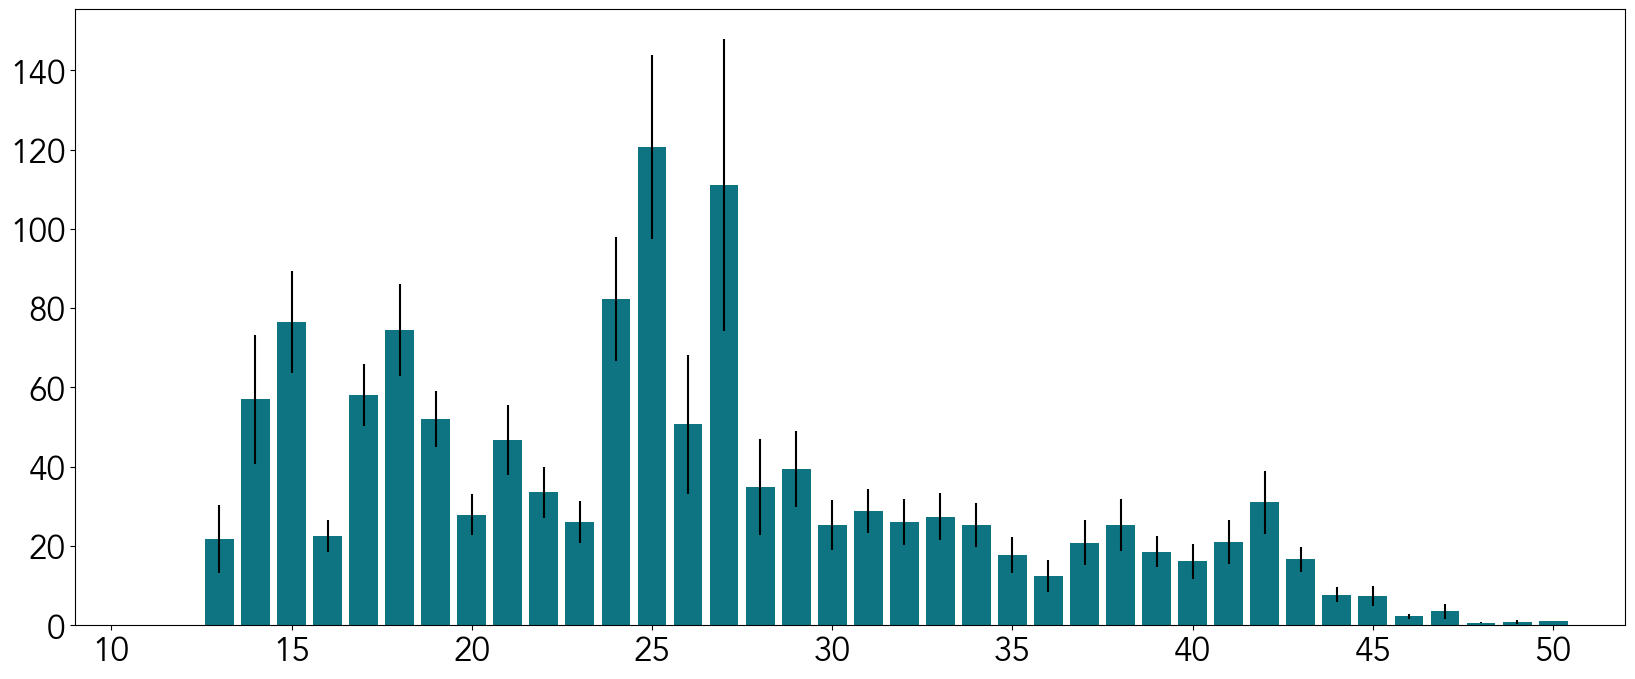

In [96]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 24})

grouped_2023 = sticky_cards_merged.loc[sticky_cards_merged['year']==2023].groupby('week')['total_scm'].mean().reset_index()
se_2023 = sticky_cards_merged.loc[sticky_cards_merged['year']==2023].groupby('week')['total_scm'].sem().reset_index()

plt.bar(grouped_2023["week"], grouped_2023["total_scm"], color='#0e7482')
plt.errorbar(x=grouped_2023["week"], y=grouped_2023["total_scm"], yerr=se_2023['total_scm'], ecolor='black', fmt='None')
plt.xlim(9, 52)


(9.0, 52.0)

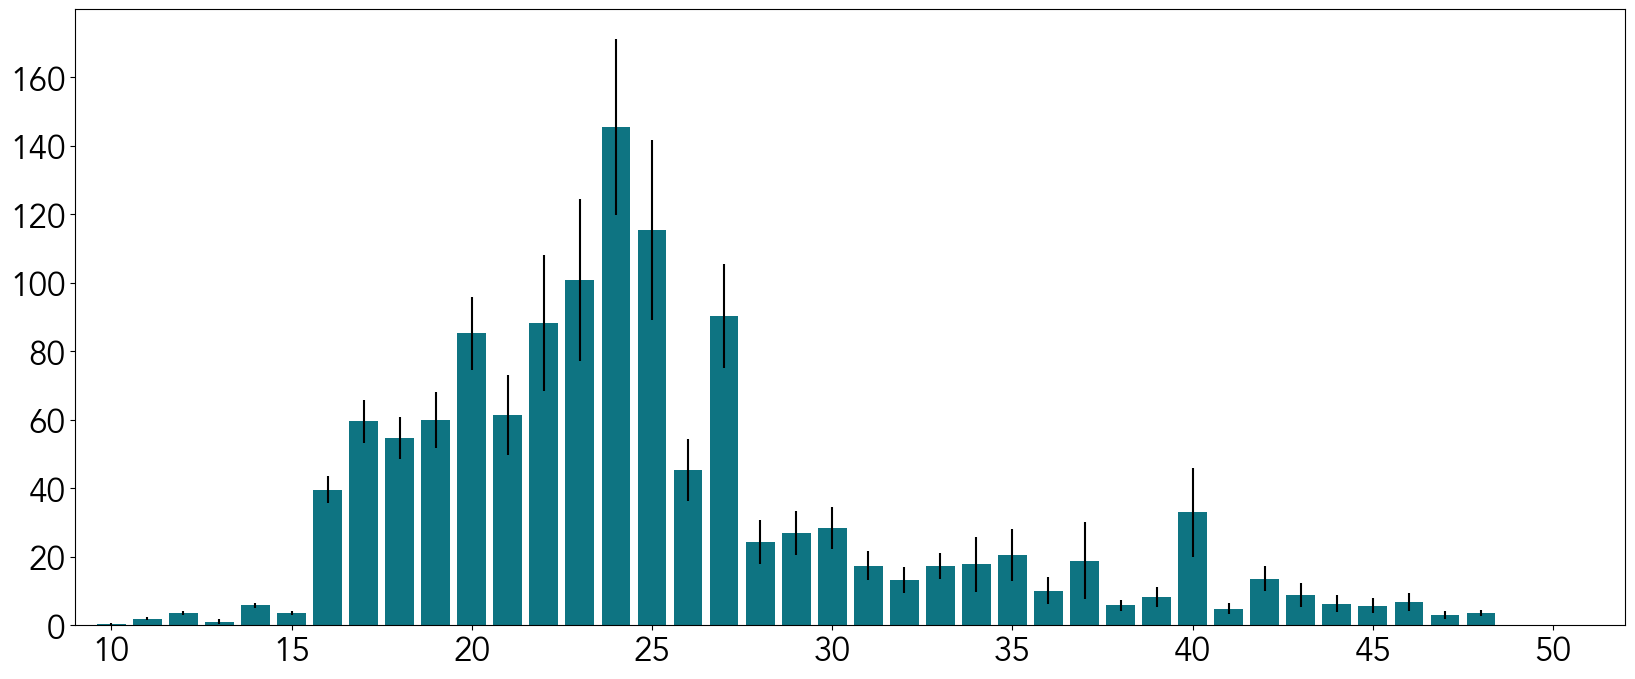

In [95]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 24})


grouped_2024 = sticky_cards_merged.loc[sticky_cards_merged['year']==2024].groupby('week')['total_scm'].mean().reset_index()
se_2024 = sticky_cards_merged.loc[sticky_cards_merged['year']==2024].groupby('week')['total_scm'].sem().reset_index()

plt.bar(grouped_2024["week"], grouped_2024["total_scm"], color='#0e7482')
plt.errorbar(x=grouped_2024["week"], y=grouped_2024["total_scm"], yerr=se_2024['total_scm'], ecolor='black', fmt='None')
plt.xlim(9, 52)


(array([19417., 19448., 19478., 19509., 19539., 19570., 19601., 19631.,
        19662., 19692., 19723., 19754.]),
 [Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11'),
  Text(19692.0, 0, '2023-12'),
  Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02')])

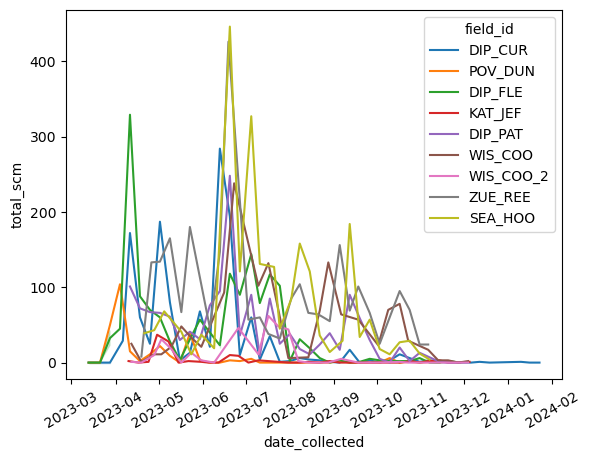

In [191]:
sns.lineplot(x='date_collected', y='total_scm', hue='field_id', data=full_season_23)
plt.xticks(rotation=30)


In [192]:
full_season_24 = scm_2024.loc[scm_2024['field_id'].isin(['DIP_PAT', 'DIP_CUR', 'DIP_FLE', 'POV_DUN', 'SEA_HOO', 'KAT_JEF', 'WIS_COO', 'WIS_COO_2', 'ZUE_REE'])]
full_season_24

,field_id,date_collected,total_scm,scm_male,scm_female,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m
1895,WIS_COO_2,2024-03-11,3.0,3.0,0.0,629.0,362.0,267.0,0.004769,0.000000,0.008287
1824,WIS_COO,2024-03-11,0.0,0.0,0.0,698.0,418.0,280.0,0.000000,0.000000,0.000000
943,KAT_JEF,2024-03-11,4.0,3.0,1.0,319.0,174.0,145.0,0.012539,0.006897,0.017241
259,DIP_CUR,2024-03-12,0.0,0.0,0.0,2104.0,1222.0,882.0,0.000000,0.000000,0.000000
1350,SEA_HOO,2024-03-12,0.0,0.0,0.0,723.0,356.0,367.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
406,DIP_FLE,2024-12-03,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,0.000000,0.000000
1348,POV_DUN,2024-12-03,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,0.000000,0.000000
483,DIP_PAT,2024-12-03,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,0.000000,0.000000
335,DIP_CUR,2024-12-03,0.0,0.0,0.0,2104.0,1222.0,882.0,0.000000,0.000000,0.000000


(array([19783., 19814., 19844., 19875., 19905., 19936., 19967., 19997.,
        20028., 20058.]),
 [Text(19783.0, 0, '2024-03'),
  Text(19814.0, 0, '2024-04'),
  Text(19844.0, 0, '2024-05'),
  Text(19875.0, 0, '2024-06'),
  Text(19905.0, 0, '2024-07'),
  Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11'),
  Text(20058.0, 0, '2024-12')])

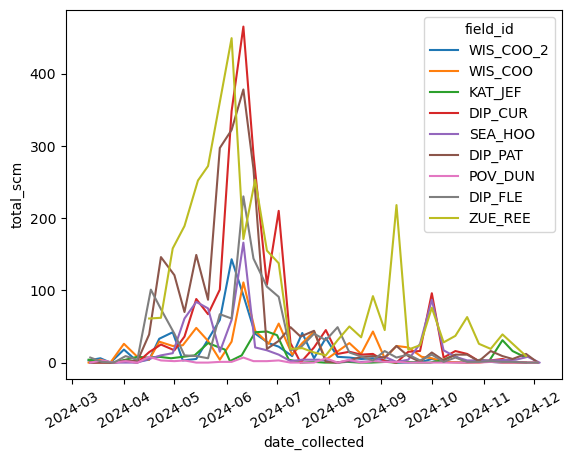

In [193]:
sns.lineplot(x='date_collected', y='total_scm', hue='field_id', data=full_season_24)
plt.xticks(rotation=30)


<Axes: xlabel='date_collected'>

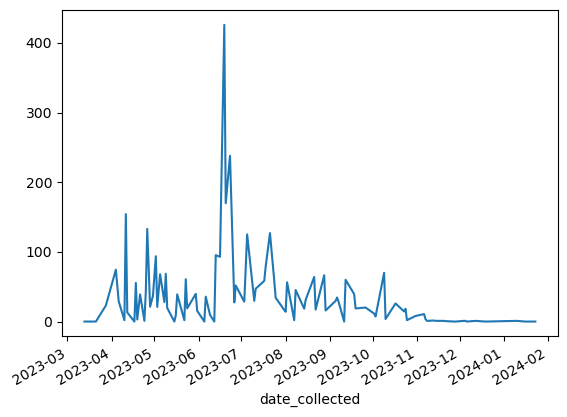

In [194]:
full_season_23.groupby('date_collected')['total_scm'].mean().plot()

<Axes: xlabel='date_collected'>

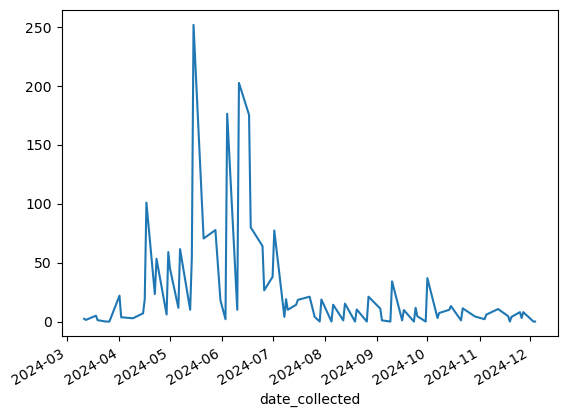

In [195]:
full_season_24.groupby('date_collected')['total_scm'].mean().plot()

<Axes: xlabel='date_collected'>

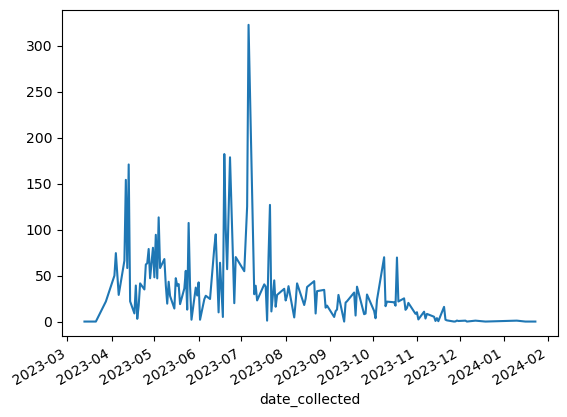

In [204]:
scm_2023.groupby('date_collected')['total_scm'].mean().plot()

<Axes: xlabel='date_collected'>

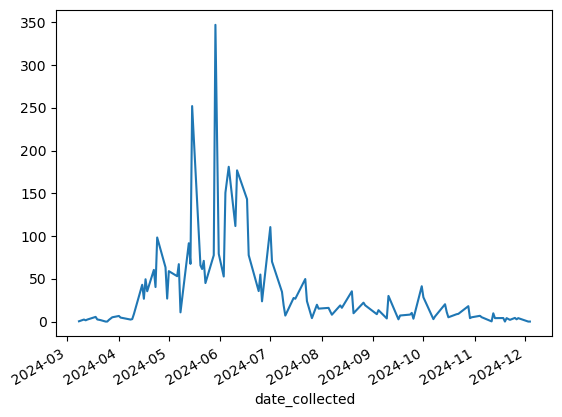

In [202]:
scm_2024.groupby('date_collected')['total_scm'].mean().plot()